# Eksplorasi dan Pra-pemrosesan Data

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.configs.config import DATA_RAW_PATH, CLASSES, IMAGE_SIZE
from src.utils.dataset_loader import load_images_from_folder
from src.preprocessing.image_preprocessing import resize_image, to_grayscale, normalize_image

## Memuat Dataset

In [2]:
print(f"Mencari data di: {DATA_RAW_PATH}")
images, labels, filenames = load_images_from_folder(DATA_RAW_PATH)
print(f"\nTotal gambar yang dimuat: {len(images)}")
print(f"Total label: {len(labels)}")

2025-10-06 01:04:52,991 - INFO - dataset_loader - Memuat gambar asli dari 'd:\CODE\python-project\klasifikasi-cuaca-svm\svm\data\raw'...


Mencari data di: d:\CODE\python-project\klasifikasi-cuaca-svm\svm\data\raw


Loading Berkabut (Foggy): 100%|██████████| 300/300 [00:01<00:00, 243.58it/s]
2025-10-06 01:04:57,697 - INFO - dataset_loader - Total gambar asli yang berhasil dimuat: 1200



Total gambar yang dimuat: 1200
Total label: 1200


## Visualisasi Sampel Gambar

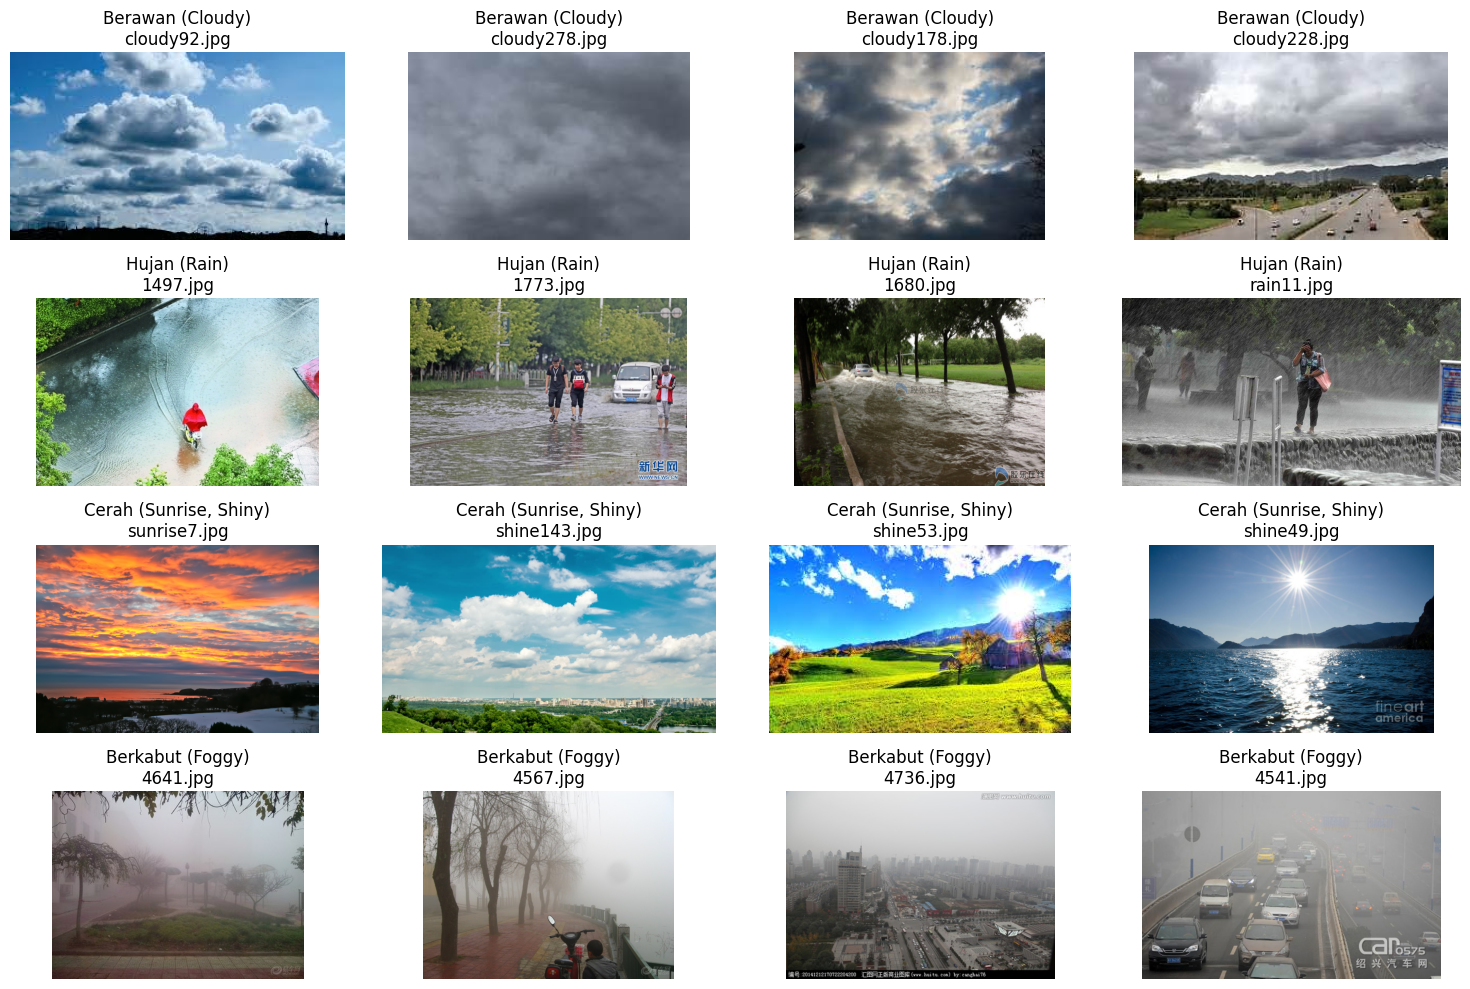

In [3]:
def show_sample_images(images, labels, num_samples=4):
    plt.figure(figsize=(15, 10))
    
    for i, class_name in enumerate(CLASSES):
        class_indices = [idx for idx, label in enumerate(labels) if label == i]
        
        if len(class_indices) > num_samples:
            sample_indices = random.sample(class_indices, num_samples)
        else:
            sample_indices = class_indices
            
        for j, img_idx in enumerate(sample_indices):
            plt.subplot(len(CLASSES), num_samples, i * num_samples + j + 1)
            img_rgb = cv2.cvtColor(images[img_idx], cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"{class_name}\n{filenames[img_idx]}")
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

show_sample_images(images, labels)

## Uji Coba Pra-pemrosesan

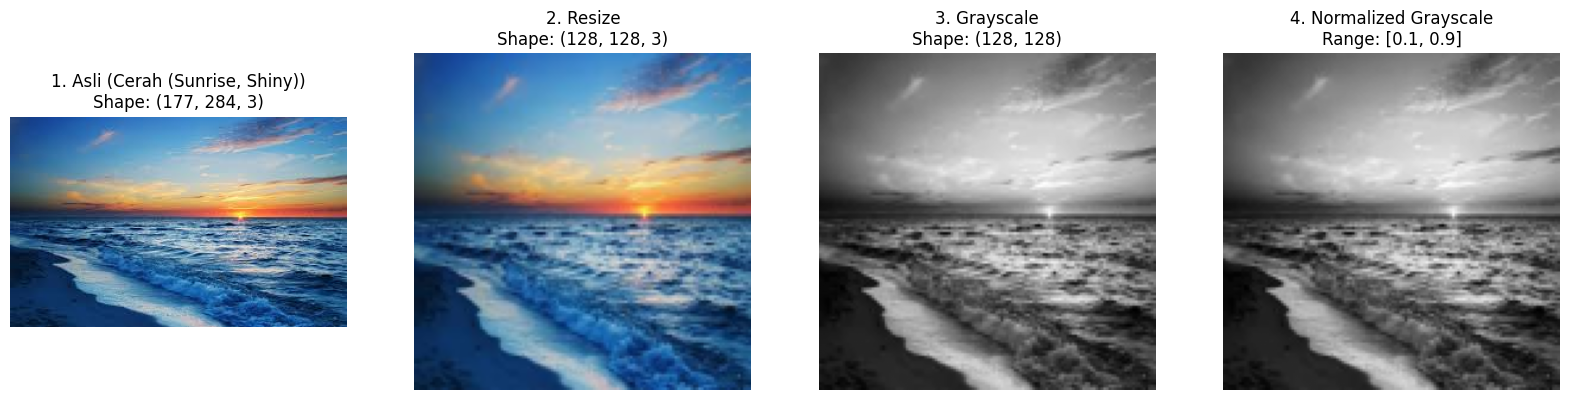

In [4]:
sample_index = random.randint(0, len(images) - 1)
sample_image = images[sample_index]
sample_label = CLASSES[labels[sample_index]]

original_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
resized_img = resize_image(sample_image)
resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
gray_img = to_grayscale(resized_img)
normalized_gray = normalize_image(gray_img)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original_rgb)
axes[0].set_title(f"1. Asli ({sample_label})\nShape: {sample_image.shape}")
axes[0].axis('off')

axes[1].imshow(resized_rgb)
axes[1].set_title(f"2. Resize\nShape: {resized_img.shape}")
axes[1].axis('off')

axes[2].imshow(gray_img, cmap='gray')
axes[2].set_title(f"3. Grayscale\nShape: {gray_img.shape}")
axes[2].axis('off')

axes[3].imshow(normalized_gray, cmap='gray')
axes[3].set_title(f"4. Normalized Grayscale\nRange: [{normalized_gray.min():.1f}, {normalized_gray.max():.1f}]")
axes[3].axis('off')

plt.show()